# 1. Data 

I will be using dataset from UCI datasets.It is the SMS Spam Collection, which is a public set of SMS labeled messages that have been collected for mobile phone spam research.The dataset has more than 5000 English, real and non-encoded messages, with their tags as spam or ham. The messages are not in chronological order. The dataset is available at  
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [1]:
# Reading dataset in a dataframe sms and viewing the first five rows 
import pandas as pd
sms = pd.read_csv('data/SMSSpamCollection', sep='\t', names= ['label', 'messages'])
sms.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
sms.messages[12]

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [3]:
sms.messages[4444]

'You know my old Dom I told you about yesterday ? His name is Roger? He got in touch with me last night and wants me to meet him today at 2 pm'

# 2. Exploratory Data Analysis

In [4]:
#Checking counts and percentage of hams and spams
print(sms.label.value_counts())
print(sms.label.value_counts()/len(sms))

ham     4825
spam     747
Name: label, dtype: int64
ham     0.865937
spam    0.134063
Name: label, dtype: float64


The dataset is highly imbalanced with 87% of messages as ham and only 13% are spams.


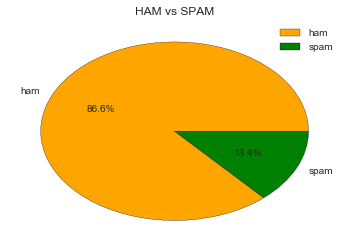

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

values = [0.865937, 0.134063]
labels = ['ham', 'spam']
colors=['orange', 'green']
pie = plt.pie(values, labels=labels, colors= colors, autopct='%1.1f%%')
plt.title('HAM vs SPAM')
plt.legend(pie[0], labels, loc="upper right")
plt.show()

In [6]:
# Creating a new feature 'length', which tells the length of the messages
sms['length']= sms['messages'].apply(len)

In [7]:
sms.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
sms.groupby('label').describe()

length
label                   
ham   count  4825.000000
      mean     71.482487
      std      58.440652
      min       2.000000
      25%      33.000000
      50%      52.000000
      75%      93.000000
      max     910.000000
spam  count   747.000000
      mean    138.670683
      std      28.873603
      min      13.000000
      25%     133.000000
      50%     149.000000
      75%     157.000000
      max     223.000000

In [9]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
label       5572 non-null object
messages    5572 non-null object
length      5572 non-null int64
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


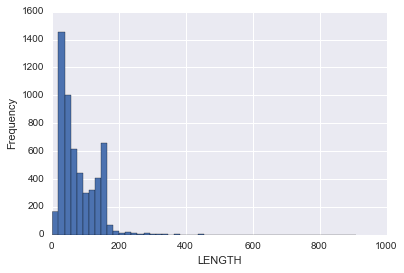

In [10]:
# Visualizing the distribution of length of text messages
sms['length'].plot(bins=50, kind='hist')
plt.xlabel('LENGTH')

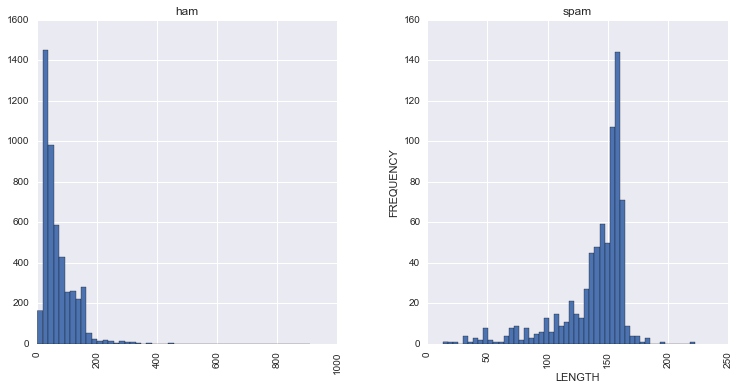

In [11]:
# Visualizing the distribution of length of text messages across labels
sms.hist(column= 'length', by = 'label', bins= 50, figsize= (12,6))
plt.xlabel("LENGTH")
plt.ylabel('FREQUENCY')

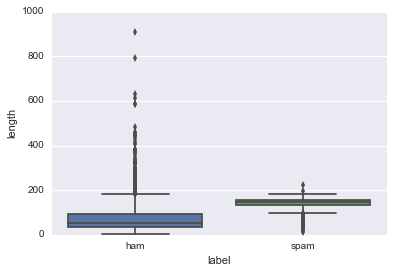

In [12]:
sns.boxplot(sms['label'], sms['length'], orient= 'v')

Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters and ham messages tend to be shorter. 

# 3. Text Preprocessing

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords 
def sms_to_words( raw_message ):
    
    ''' Function to remove non- letters, punctuations and stop words from the raw text messages'''
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_message) 
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in letters_only if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    #Convert to lower case, split into individual words
    words = nopunc.lower().split()   
    
    #Remove stop words
    return [w for w in words if w not in stopwords.words("english")]   

In [14]:
# Applying the defined function above on a text message
sms_to_words(sms['messages'][34])

['thanks',
 'subscription',
 'ringtone',
 'uk',
 'mobile',
 'charged',
 'month',
 'please',
 'confirm',
 'replying',
 'yes',
 'reply',
 'charged']

In [15]:
# Applying the defined function 'sms_to words' on a dataframe sms
sms['messages'].apply(sms_to_words)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
5       [freemsg, hey, darling, week, word, back, like...
6       [even, brother, like, speak, treat, like, aids...
7       [per, request, melle, melle, oru, minnaminungi...
8       [winner, valued, network, customer, selected, ...
9       [mobile, months, u, r, entitled, update, lates...
10      [gonna, home, soon, want, talk, stuff, anymore...
11      [six, chances, win, cash, pounds, txt, csh, se...
12      [urgent, week, free, membership, prize, jackpo...
13      [searching, right, words, thank, breather, pro...
14                                         [date, sunday]
15      [xxxmobilemovieclub, use, credit, click, wap, ...
16                                      [oh, k, watching]
17      [eh, u

# VISUALIZATION

WORDCLOUD

A worldcloud is a collage of words and those words that are bigger in size have a high frequency. They are a very information-dense representation of the frequency of all words in a given text. Word clouds are more effective than just using bar charts displaying the counts of words for large amounts of text, as the chart would be difficult to parse if there are too many bars. 

We  will see the most frequents words in ham and spam classes using worldcloud

In [16]:
from wordcloud import WordCloud

In [17]:
sms['words']= sms['messages'].apply(sms_to_words)

In [18]:
sms.head()

,label,messages,length,words
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, think, goes, usf, lives, around, though]"


In [19]:
ham = sms[sms.label== 'ham']
spam = sms[sms.label== 'spam']

In [20]:
ham_words = ''
spam_words = ''
for word in ham['words']:
    ham_words = ham_words + str(word) +' '
for word in spam['words']:
    spam_words = spam_words + str(word) +' '
   

In [21]:
spam_wordcloud = WordCloud(width=600, height=400, background_color= 'white').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color = 'white').generate(ham_words)


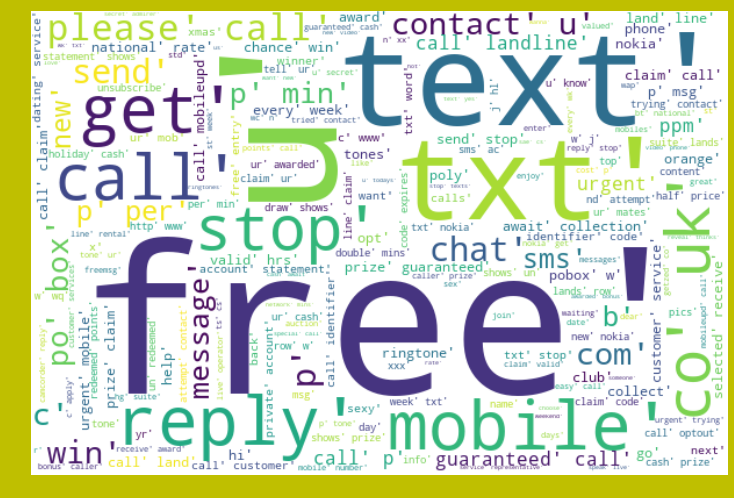

In [22]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='y')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

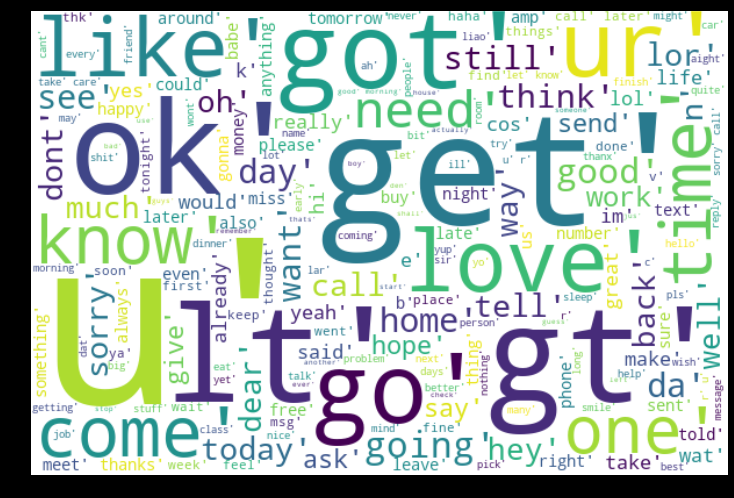

In [23]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 4. Vectorization

Currently, we have the messages as lists of tokens and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.
Now we'll convert each message, represented as a list of tokens above, into a vector that machine learning models can understand.
We'll do that in three steps using the bag-of-words model:

    1.Count how many times does a word occur in each message (Known as term frequency)

    2.Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
 
    3. Normalize the vectors to unit length, to abstract from the original text length(L2 norm)



The bag of words model learns vocabulary from all the documents, then models each document by counting number of times the word occurs in the document.We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# inialize CountVectorizer
cv= CountVectorizer(analyzer=sms_to_words) 

# it fits the model and learns the vocabulary
cv_transformer = cv.fit(sms['messages'])

# number of vocabulary words
len(cv_transformer.vocabulary_)


7641

In [25]:
sms7= sms.messages[6]
print(sms7)

Even my brother is not like to speak with me. They treat me like aids patent.


In [26]:
# lets see vector representation for message7 using countvectorizer
transformed7 = cv_transformer.transform([sms7])
print(transformed7)
transformed7.shape

  (0, 145)	1
  (0, 842)	1
  (0, 2092)	1
  (0, 3681)	2
  (0, 4751)	1
  (0, 6141)	1
  (0, 6874)	1


(1, 7641)

We can see that the 7th message in a row has 7 unique words after removing common stop words, one of them appear twice and others only once.

In [27]:
# Checking the word in 7th message which appeared twice
cv_transformer.get_feature_names()[3681]

'like'

In [28]:
vocab= cv_transformer.get_feature_names()
print(vocab)

['aa', 'aah', 'aaniye', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'absolutly', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accounts', 'accumulation', 'achan', 'ache', 'achieve', 'acid', 'acknowledgement', 'acl', 'acnt', 'aco', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adrink', 'ad

In [29]:
#Now we can use .transform on our Bag-of-Words transformed object and transform the entire DataFrame of messages.
sms_transformed = cv_transformer.transform(sms['messages'])

In [30]:
print(sms_transformed)

  (0, 220)	1
  (0, 450)	1
  (0, 870)	1
  (0, 872)	1
  (0, 1156)	1
  (0, 1427)	1
  (0, 1910)	1
  (0, 2648)	1
  (0, 2689)	1
  (0, 2728)	1
  (0, 3418)	1
  (0, 3541)	1
  (0, 4284)	1
  (0, 4939)	1
  (0, 7259)	1
  (0, 7470)	1
  (1, 3386)	1
  (1, 3574)	1
  (1, 4542)	1
  (1, 4569)	1
  (1, 6957)	1
  (1, 7374)	1
  (2, 305)	1
  (2, 914)	1
  (2, 1270)	1
  :	:
  (5567, 6957)	2
  (5568, 479)	1
  (5568, 2074)	1
  (5568, 2441)	1
  (5568, 2658)	1
  (5568, 2981)	1
  (5569, 4180)	1
  (5569, 4881)	1
  (5569, 6399)	1
  (5570, 59)	1
  (5570, 682)	1
  (5570, 905)	1
  (5570, 1985)	1
  (5570, 2454)	1
  (5570, 2567)	1
  (5570, 2783)	1
  (5570, 3238)	1
  (5570, 3681)	1
  (5570, 4383)	1
  (5570, 6079)	1
  (5570, 7068)	1
  (5570, 7305)	1
  (5571, 4296)	1
  (5571, 5537)	1
  (5571, 6896)	1


In [31]:
sms_transformed.shape

(5572, 7641)


# TF-IDF


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.


TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining.This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

Typically, the tf-idf weight is composed by two terms: 

1.TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).


2.IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).



In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(sms_transformed)

In [33]:
#lets transform the 7th message into TF-IDF corpus
print(tfidf_transformer.transform(transformed7))

  (0, 6874)	0.345454920833
  (0, 6141)	0.310202514493
  (0, 4751)	0.454295415471
  (0, 3681)	0.425950837203
  (0, 2092)	0.279648074051
  (0, 842)	0.33470806325
  (0, 145)	0.454295415471


In [34]:
# transform the entire bag-of-words corpus into TF-IDF corpus at once
sms_tfidf = tfidf_transformer.transform(sms_transformed)
print(sms_tfidf)
print(sms_tfidf.shape)

  (0, 7470)	0.227241032257
  (0, 7259)	0.187705887964
  (0, 4939)	0.262761455595
  (0, 4284)	0.173568361362
  (0, 3541)	0.271831361954
  (0, 3418)	0.335945533831
  (0, 2728)	0.185576497987
  (0, 2689)	0.157329380256
  (0, 2648)	0.15132315301
  (0, 1910)	0.193625278005
  (0, 1427)	0.260166690515
  (0, 1156)	0.283808144532
  (0, 872)	0.283808144532
  (0, 870)	0.320696325019
  (0, 450)	0.25127630324
  (0, 220)	0.335945533831
  (1, 7374)	0.423536965178
  (1, 6957)	0.19273406378
  (1, 4569)	0.536375670368
  (1, 4542)	0.266796666417
  (1, 3574)	0.400670165053
  (1, 3386)	0.513861963613
  (2, 7429)	0.209086063499
  (2, 7386)	0.159645258565
  (2, 6942)	0.135885539098
  :	:
  (5567, 858)	0.261688504737
  (5568, 2981)	0.33863719055
  (5568, 2658)	0.337738685379
  (5568, 2441)	0.518990889421
  (5568, 2074)	0.601413490964
  (5568, 479)	0.37444319083
  (5569, 6399)	0.609530778983
  (5569, 4881)	0.609530778983
  (5569, 4180)	0.506896891827
  (5570, 7305)	0.210519947382
  (5570, 7068)	0.234774157958


# 5. Training and Evaluation of model

A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data, which is representative of true predictive performance. I am using 30% of my dataset as a test data.


In [35]:
from sklearn.cross_validation import train_test_split
sms_train, sms_test, label_train, label_test= train_test_split(sms['messages'], sms['label'], test_size= 0.3)
(sms_train.shape, label_train.shape, sms_test.shape, label_test.shape)

((3900,), (3900,), (1672,), (1672,))

We will use SciKit Learn's pipeline capabilities to store a pipline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc

NAIVE BAYES CLASSIFIER

In [37]:
nb_pipeline = Pipeline([
    ('CV', CountVectorizer(analyzer = sms_to_words)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [38]:
nb_pipeline.fit(sms_train,label_train)
nb_pred = nb_pipeline.predict(sms_test)
print(classification_report(nb_pred,label_test))
print(pd.crosstab(label_test,nb_pred, rownames= ['Actual'], colnames= ['Predicted']))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1507
       spam       0.71      1.00      0.83       165

avg / total       0.97      0.96      0.96      1672

Predicted   ham  spam
Actual               
ham        1441     0
spam         66   165


In [39]:
nb_pred_proba = nb_pipeline.predict_proba(sms_test)[:,1] 
nb_pred_proba

array([ 0.03172959,  0.00312514,  0.00950667, ...,  0.00380018,
        0.00598494,  0.00483011])

In [40]:
numlabel_test= label_test.map({'ham':0, 'spam':1})


In [41]:
nb_fpr, nb_tpr, nb_thresholds = roc_curve(numlabel_test, nb_pred_proba)
nb_auc = auc(nb_fpr,nb_tpr)
nb_auc

0.98561304529382254

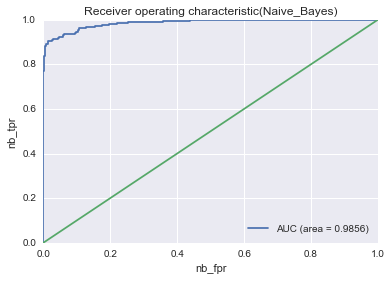

In [42]:
plt.plot(nb_fpr,nb_tpr,label='AUC (area = %0.4f)' % nb_auc)
plt.xlabel('nb_fpr')
plt.ylabel('nb_tpr')
plt.title('Receiver operating characteristic(Naive_Bayes)')
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.show()

The prediction accuracy in Area Under ROC curve of Naive Bayes model is about 98%.  About 98% of the predicted labels are correct.

RANDOM FOREST CLASSIFIER

In [43]:
rf_pipeline = Pipeline([
    ('CV', CountVectorizer(analyzer = sms_to_words)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators= 100)),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [44]:
rf_pipeline.fit(sms_train,label_train)
rf_pred = rf_pipeline.predict(sms_test)
print(classification_report(rf_pred,label_test))
print(pd.crosstab(label_test,rf_pred, rownames= ['Actual'], colnames= ['Predicted']))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1490
       spam       0.79      1.00      0.88       182

avg / total       0.98      0.97      0.97      1672

Predicted   ham  spam
Actual               
ham        1441     0
spam         49   182


In [45]:
rf_pred_proba = rf_pipeline.predict_proba(sms_test)[:,1] 
rf_pred_proba

array([ 0.04,  0.01,  0.  , ...,  0.11,  0.  ,  0.  ])

In [46]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(numlabel_test, rf_pred_proba)
rf_auc = auc(rf_fpr,rf_tpr)
rf_auc

0.99313998515941604

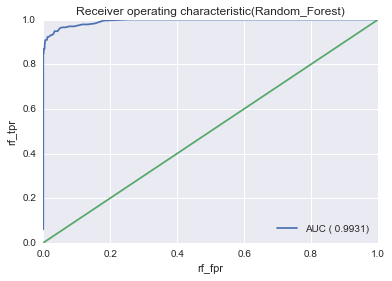

In [47]:
plt.plot(rf_fpr,rf_tpr,label='AUC ( %0.4f)' % rf_auc)
plt.xlabel('rf_fpr')
plt.ylabel('rf_tpr')
plt.title('Receiver operating characteristic(Random_Forest)')
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.show()

SUPPORT VECTOR CLASSIFIER(SVC)

In [48]:
numlabel_train= label_train.map({'ham':0, 'spam':1})

In [49]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

svc_pipeline = Pipeline([
    ('CV', CountVectorizer(analyzer = sms_to_words)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector classifier
])

# Classifier parameters
params = [
  {'classifier__C': [1, 10, 100, 1000], 'classifier__gamma': [0.001, 0.0001], 'classifier__kernel':
['rbf', 'linear']},
]

svc_grid = GridSearchCV(
    svc_pipeline,# Our pipeline from above
    param_grid= params, # The parameters we set above
    scoring='accuracy', # score we are optimizing
    cv= StratifiedKFold(label_train, n_folds=5)#type of cross fold validation to use
)


In [50]:
%time svc_spamdetector = svc_grid.fit(sms_train,label_train)

CPU times: user 8min 51s, sys: 1min 10s, total: 10min 2s
Wall time: 10min 5s


In [51]:
print(svc_spamdetector.grid_scores_)

[mean: 0.86769, std: 0.00043, params: {'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}, mean: 0.98462, std: 0.00436, params: {'classifier__C': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}, mean: 0.86769, std: 0.00043, params: {'classifier__C': 1, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}, mean: 0.98462, std: 0.00436, params: {'classifier__C': 1, 'classifier__gamma': 0.0001, 'classifier__kernel': 'linear'}, mean: 0.86769, std: 0.00043, params: {'classifier__C': 10, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}, mean: 0.98564, std: 0.00248, params: {'classifier__C': 10, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}, mean: 0.86769, std: 0.00043, params: {'classifier__C': 10, 'classifier__gamma': 0.0001, 'classifier__kernel': 'rbf'}, mean: 0.98564, std: 0.00248, params: {'classifier__C': 10, 'classifier__gamma': 0.0001, 'classifier__kernel': 'linear'}, mean: 0.96615, std: 0.00655, params: {'classifier__

In [59]:
svc_pred = svc_spamdetector.predict(sms_test)
print(classification_report(svc_pred,label_test))
print(pd.crosstab(label_test,svc_pred, rownames= ['Actual'], colnames= ['Predicted']))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      1463
       spam       0.88      0.97      0.92       209

avg / total       0.98      0.98      0.98      1672

Predicted   ham  spam
Actual               
ham        1435     6
spam         28   203


SANITY TEST

Lets look at the some random spam messages and prediction of their labels using Naive Bayes and Random Forest

In [53]:
print(nb_pipeline.predict(['T-Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty. Call on 0845 089 3680.Offer ends 28thJuly.T&C apply'])[0]) 
print(nb_pipeline.predict(['Think ur smart ? Win £200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week'])[0])
print(nb_pipeline.predict(['You have still not claimed the guaranteed prize you are due. To start the process please reply YES or call 321876231'])[0])
print(nb_pipeline.predict(['Ur ringtone service has changed! 25 Free credits! Go to club4mobiles.com to choose content now! Stop? txt CLUB STOP to 87070.'])[0])

spam
spam
ham
spam


In [54]:
print(rf_pipeline.predict(['T-Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty. Call on 0845 089 3680.Offer ends 28thJuly.T&C apply'])[0]) 
print(rf_pipeline.predict(['Think ur smart ? Win £200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week'])[0])
print(rf_pipeline.predict(["You have still not claimed ur guaranteed prize you are due. To start the process please reply YES or call 321876231"])[0])
print(rf_pipeline.predict(['Ur ringtone service has changed! 25 Free credits! Go to club4mobiles.com to choose content now! Stop? txt CLUB STOP to 87070.'])[0])

spam
spam
spam
spam


Based on the above report, we can see that Naive Bayes classifier misclassified one spam message as ham. Random Forest on the other hand, classified all the messages correctly.

Lets have a look on classifier's performance on some ham messages.


In [55]:
print(nb_pipeline.predict(['The item you placed on hold is available for pickup from the Library and will be kept for three library business days, not including the day of your notice'])[0])
print(nb_pipeline.predict(['Invite your friends and family. Share the Uber love and give friends free rides to try Uber, worth up to $20 each!'])[0])
print(nb_pipeline.predict(['Thanks for updating your DSW Rewards profile!'])[0])
print(nb_pipeline.predict(['Great news we hav already created your online My Place Rewards* account for you. Click here to confirm the below email address and reset your password.'])[0])                        

ham
ham
ham
ham


In [56]:
print(rf_pipeline.predict(['The item you placed on hold is available for pickup from the Library and will be kept for three library business days, not including the day of your notice'])[0])
print(rf_pipeline.predict(['Invite your friends and family. Share the Uber love and give friends free rides to try Uber, worth up to $20 each!'])[0])
print(rf_pipeline.predict(['Thanks for updating your DSW Rewards profile!'])[0])
print(rf_pipeline.predict(['Great news we hav already created your online My Place Rewards* account for you. Click here to confirm the below email address and reset your password.'])[0])                        

ham
ham
ham
ham


Both the classifiers correctly classified the ham messages.

Now I have the classification report for all the three classifiers. The results from SVM are great but applying SVM with different kernels increases the complexity of the model and thus the running time of training the model on data. As SVM took comparatively more time in fitting the model, so I focused more on Naïve Bayes and Random Forest. Based on the sanity test on NB and Random Forest classifiers using some random messages, I chose Random Forest as my final model.